In [1]:
import os
import glob
import cv2
import collections
import ntpath
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
#paths to folders to combine
#have all chro folders to be combined inide a folder in to_combine folder
main_path = "/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/extracted/individual/chromosome"
folder_path = main_path + "/to_combine"
#folder number for combined result folder 
#(make sure it is not same as an already existig folder to avoid overwriting the existing folder)
output_folder_tag = 6
original_nuc_path = "/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc"

In [3]:
def sort_list(lst):
  lst = sorted(lst, key = lambda fl : int(ntpath.basename(fl).split('.')[0]))
  return lst

In [ ]:
#reading original images to do bitwise AND and save after combining
nucleous=[]
for file in glob.glob(original_nuc_path + "/*.jpg"):
  nucleous.append(file)
nucleous = sort_list(nucleous)
print(len(nucleous))
print(nucleous)

In [5]:
# read folders to combine
mapper=collections.defaultdict(list)
folders = {}
for count, filename in enumerate(os.listdir(f'{folder_path}')):
  print(count, filename)
  folders[count] = filename

for count, folder in folders.items():
  for file in glob.glob(folder_path +"/"+ folder +"/*.jpg"):
    mapper[count].append(file)
  mapper[count] = sort_list(mapper[count])

num_images = len(mapper[0])
print(num_images)

org = Image.open(mapper[0][0])
org.load()
org = np.array(org)
ip_shape = org.shape
# print(ip_shape)

# plt.imshow(org)
# print(np.unique(org))

# print(mapper)
# print(mapper[0])
# print(mapper[1])
# print(len(mapper[0]))
# print(len(mapper[1]))

0 ch_27
1 ch_24
921


[0 1]
921


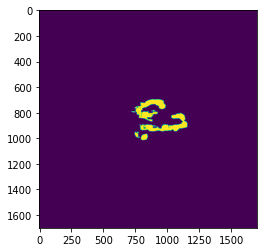

In [6]:
#saving combined on a new mask
final_imgs = []
for i in range(num_images):
  # print("i ",i)
  # print(len(final_imgs))
  # if(i==1):
  #   break
  x=np.zeros(ip_shape, np.uint8)
  for k in mapper.keys():
    # print(mapper[k][i])
    im = Image.open(mapper[k][i])
    im.load()
    im = np.array(im)
    im[im<40]=0
    x[im!=0] = 1
  final_imgs.append(x)

plt.imshow(x)
print(np.unique(x))
print(len(final_imgs))


In [7]:
#save combined folder
for k in range(num_images):
  # temp = (Label_Img[k]==label_chro)
  # temp = temp.astype(np.uint8)
  chro_temp = Image.open(nucleous[k])
  chro_temp.load()
  chro_temp = np.array(chro_temp)
  temp2= cv2.bitwise_and(chro_temp,chro_temp, mask = final_imgs[k])
  # temp2[temp2<40]=0
  # plt.imshow(temp2)
  # print(np.unique(temp2))
  # break
  tag=k
  path_tag = "ch_"+ str(output_folder_tag)
  complete_path = main_path + "/" + path_tag
  if not os.path.exists(complete_path):
    from pathlib import Path
    Path(complete_path).mkdir(parents=True, exist_ok=True)
  # cv2.imwrite(complete_path+"/"+ f"{tag:03d}"+".jpg", (temp2* 255).astype(np.uint8)) #####
  cv2.imwrite(complete_path+"/"+ f"{tag:03d}"+".jpg", (temp2))


In [8]:
#update info.txt with details
file_path = main_path + '/Info.txt'

if os.path.exists(file_path):
    mode = 'a'
else:
    mode = 'w'

to_write = f'''{path_tag} is the result of combining '''
for count, folder in folders.items():
  to_write = to_write + " " + folder

with open(file_path, mode) as file:
    file.write("\n")
    file.write(f'''{to_write} in {folder_path} folder''')